[home](https://nils-holmberg.github.io/sfac-py/web/211001-jnb/)

# day 5: getting started with collaborating on python code
- overview day 5

|time  |section |concepts                      |outcomes                                                           |
|:-----|:-------|:-----------------------------|:------------------------------------------------------------------|
|09-10 |5.1.1   |[project](511-intro.html)     |ideas about how to organize a python project                       |
|      |5.1.2   |python syntax                 |practice data structures, conditional statements, flow control     |
|      |5.1.3   |documentation                 |how to comment and document python code for later use              |
|      |break   |                              |                                                                   |
|10-11 |5.2.1   |[collaborate](521-colab.html) |using python in the cloud                                          |
|      |5.2.2   |google                        |upload data, notebooks to google colab, install packages using pip |
|      |5.2.3   |ms azure                      |basically same thing as google, also look into kaggle, amazon      |
|      |break   |                              |                                                                   |
|11-12 |5.3.1   |[publish](531-publish.html)   |open science framework, github, gitlab, bitbucket                  |
|      |5.3.2   |browser                       |presenting notebooks in nbviewer.jupyter.org                       |
|      |5.3.3   |repos                         |how to use version control on python projects                      |
|12-13 |lunch   |                              |                                                                   |

# section 5.1.1
- check, update anaconda, install new packages to venv

```python
# update anaconda, env packages
conda update anaconda
conda update --all
# start jupyter notebook
jupyter notebook
```

# section 5.1.2
- some line

# section 5.1.3
- some line


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline
#%reload_ext autoreload
#%autoreload 2

In [2]:
#dfc = pd.read_csv('some.csv')
print(sns.get_dataset_names())
df = sns.load_dataset('car_crashes')
df.head()

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


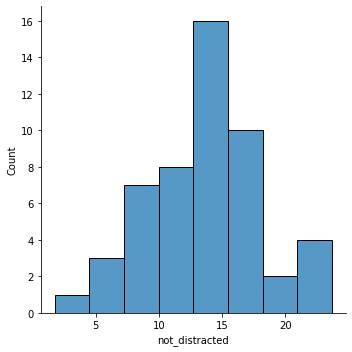

In [3]:
sns.displot(df['not_distracted'])

## Quickly Creating Summary Counts in Pandas

We are studying the species and weight of animals caught in plots in our study
area. The dataset is stored as a `.csv` file: each row holds information for a
single animal, and the columns represent:

| Column           | Description                        |
|------------------|------------------------------------|
| record_id        | Unique id for the observation      |
| month            | month of observation               |
| day              | day of observation                 |
| year             | year of observation                |
| site_id          | ID of a particular plot            |
| species_id       | 2-letter code                      |
| sex              | sex of animal ("M", "F")           |
| hindfoot_length  | length of the hindfoot in mm       |
| weight           | weight of the animal in grams      |

Let's next count the number of samples for each species. We can do this in a few
ways, but we'll use `groupby` combined with **a `count()` method**.

In [4]:
surveys_df = pd.read_csv("../../csv/surveys.csv")

# Count the number of samples by species
species_counts = surveys_df.groupby('species_id')['record_id'].count()
print(species_counts)

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64



Or, we can also count just the rows that have the species "DO":



In [5]:
surveys_df.groupby('species_id')['record_id'].count()['DO']

3027

## Basic Math Functions

If we wanted to, we could perform math on an entire column of our data. For
example let's multiply all weight values by 2. A more practical use of this might
be to normalize the data according to a mean, area, or some other value
calculated from our data.



In [6]:
# Multiply all weight values by 2 but does not change the original weight data
surveys_df['weight']*2

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
35544      NaN
35545      NaN
35546     28.0
35547    102.0
35548      NaN
Name: weight, Length: 35549, dtype: float64

## Quick & Easy Plotting Data Using Pandas

We can plot our summary stats using Pandas, too.



<AxesSubplot:xlabel='species_id'>

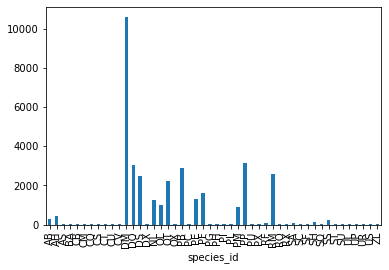

In [7]:
## To make sure figures appear inside Jupyter Notebook
%matplotlib inline

# Create a quick bar chart
species_counts.plot(kind='bar')

#### Animals per site plot

We can also look at how many animals were captured in each site.

<AxesSubplot:xlabel='site_id'>

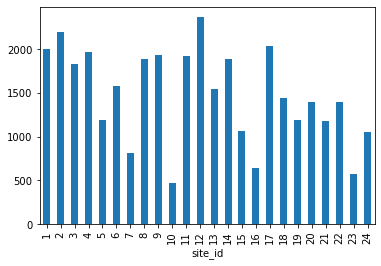

In [8]:
total_count = surveys_df.groupby('site_id')['record_id'].nunique()
# Let's plot that too
total_count.plot(kind='bar')

## _Extra Plotting Challenge_

1. Create a plot of average weight across all species per plot.

2. Create a plot of total males versus total females for the entire dataset.
 
3. Create a stacked bar plot, with weight on the Y axis, and the stacked variable being sex. The plot should show total weight by sex for each plot. Some tips are below to help you solve this challenge:
[For more on Pandas plots, visit this link.](http://pandas.pydata.org/pandas-docs/stable/visualization.html#basic-plotting-plot)





### _Solution to Extra Plotting Challenge 1_

<AxesSubplot:xlabel='site_id'>

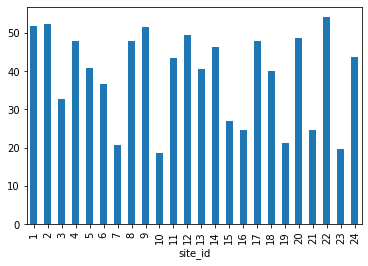

In [9]:
## Solution Plotting Challenge 1
surveys_df.groupby('site_id').mean()["weight"].plot(kind='bar')

### _Solution to Extra Plotting Challenge 2_

<AxesSubplot:xlabel='sex'>

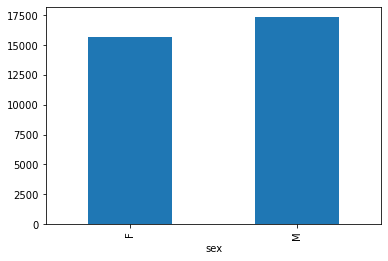

In [10]:
# Solution Plotting Challenge 2
## Create plot of total males versus total females for the entire dataset.

surveys_df.groupby('sex').count()["record_id"].plot(kind='bar')

### _Solution to Extra Plotting Challenge 3_

First we group data by site and by sex, and then calculate a total for each site.

In [13]:
by_site_sex = surveys_df.groupby(['site_id','sex'])
#by_site_sex.head()

site_sex_count = by_site_sex['weight'].sum()
site_sex_count.head()

site_id  sex
1        F      38253.0
         M      59979.0
2        F      50144.0
         M      57250.0
3        F      27251.0
Name: weight, dtype: float64


This calculates the sums of weights for each sex within each plot as a table

```
site  sex
site_id  sex
1        F      38253
         M      59979
2        F      50144
         M      57250
3        F      27251
         M      28253
4        F      39796
         M      49377
<other sites removed for brevity>
```

Below we'll use `.unstack()` on our grouped data to figure out the total weight that each sex contributed to each plot.



In [14]:
by_site_sex = surveys_df.groupby(['site_id','sex'])
site_sex_count = by_site_sex['weight'].sum()
site_sex_count.unstack()

sex,F,M
site_id,,
1,38253.0,59979.0
2,50144.0,57250.0
3,27251.0,28253.0
4,39796.0,49377.0
5,21143.0,23326.0
6,26210.0,27245.0
7,6522.0,6422.0
8,37274.0,47755.0
9,44128.0,48727.0


Now, create a stacked bar plot with that data where the weights for each sex are stacked by plot.

Rather than display it as a table, we can plot the above data by stacking the values of each sex as follows:

Text(0.5, 0, 'Site')

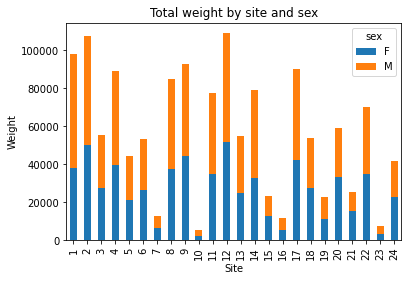

In [15]:
by_site_sex = surveys_df.groupby(['site_id', 'sex'])
site_sex_count = by_site_sex['weight'].sum()
spc = site_sex_count.unstack()
s_plot = spc.plot(kind='bar', stacked=True, title="Total weight by site and sex")
s_plot.set_ylabel("Weight")
s_plot.set_xlabel("Site")